# Name : In-Sang Song
# Student ID : 2018120201

# Link to github : [assignment09 github](https://github.com/johnjunior65/assignment09.git)

## 과제의 조건으로 주어진 train, test 코드입니다.
## 추가로 sign(x)함수를 정의해주었습니다.

In [141]:
import matplotlib.pyplot as plt
import numpy as np

file_data_train = "C:\\Users\\johnjunior\\Desktop\\data\\mnist_train.csv"
file_data_test  = "C:\\Users\\johnjunior\\Desktop\\data\\mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28
size_col    = 28

num_train   = len(data_train)
num_test    = len(data_test)

In [142]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

In [143]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    
    return(s)

In [144]:
def sign(x):
    if x > 0:
        return 1.
    elif x < 0:
        return -1.
    elif x == 0:
        return 0.
    else:
        return x

In [145]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

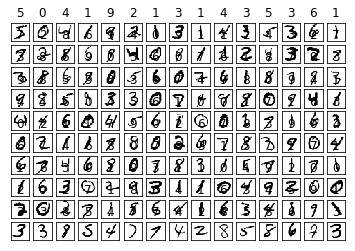

In [146]:
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

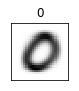

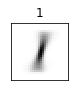

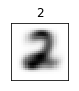

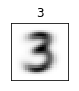

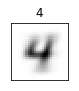

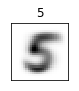

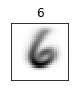

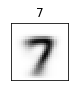

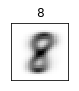

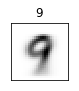

In [147]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


    plt.show()

# r의 갯수를 2로했을때를 계산했습니다.

In [148]:
x0 = np.asmatrix(im_average[:,0])
x1 = np.asmatrix(im_average[:,1])
x2 = np.asmatrix(im_average[:,2])
x3 = np.asmatrix(im_average[:,3])
x4 = np.asmatrix(im_average[:,4])
x5 = np.asmatrix(im_average[:,5])
x6 = np.asmatrix(im_average[:,6])
x7 = np.asmatrix(im_average[:,7])
x8 = np.asmatrix(im_average[:,8])
x9 = np.asmatrix(im_average[:,9])



r1 = np.zeros(784, dtype=float)

for i in range (784):
    r1[i] = np.random.normal(0,1)
    rm1 = np.asmatrix(r1)
    
r2 = np.zeros(784, dtype=float)    
    
for i in range (784):
    r2[i] = np.random.normal(0,1)
    rm2 = np.asmatrix(r2)

In [149]:
AA = np.array([[rm1*x0.T,rm2*x0.T],[rm1*x1.T,rm2*x1.T],[rm1*x2.T,rm2*x2.T],[rm1*x3.T,rm2*x3.T],[rm1*x4.T,rm2*x4.T],[rm1*x5.T,rm2*x5.T],[rm1*x6.T,rm2*x6.T],[rm1*x7.T,rm2*x7.T],[rm1*x8.T,rm2*x8.T],[rm1*x9.T,rm2*x9.T]])

A = np.asmatrix(AA)

yy = np.array([1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

y = np.asmatrix(yy)

In [150]:
thetan2 = (A.T*A).I*A.T*y.T

In [151]:
display(A*thetan2)

matrix([[-0.03651403],
        [ 0.0162674 ],
        [-0.0070492 ],
        [ 0.00377217],
        [-0.00122777],
        [-0.01313291],
        [-0.03390749],
        [ 0.00674021],
        [-0.00065228],
        [-0.01046506]])

### Score를 계산하기 위해 precision, recall값을 구하면, precision = 0이기 때문에 Score = 0으로 나왔습니다.

# r의 갯수를 4로했을때를 계산했습니다.

In [155]:
fp = np.random.normal(0, 1, (4, 784))
fpm = np.asmatrix(fp)

rm1 = fpm[0,:]
rm2 = fpm[1,:]
rm3 = fpm[2,:]
rm4 = fpm[3,:]

AA = np.array([[rm1*x0.T,rm2*x0.T,rm3*x0.T,rm4*x0.T],[rm1*x1.T,rm2*x1.T,rm3*x1.T,rm4*x1.T],[rm1*x2.T,rm2*x2.T,rm3*x2.T,rm4*x2.T],[rm1*x3.T,rm2*x3.T,rm3*x3.T,rm4*x3.T],[rm1*x4.T,rm2*x4.T,rm3*x4.T,rm4*x4.T],[rm1*x5.T,rm2*x5.T,rm3*x5.T,rm4*x5.T],[rm1*x6.T,rm2*x6.T,rm3*x6.T,rm4*x6.T],[rm1*x7.T,rm2*x7.T,rm3*x7.T,rm4*x7.T],[rm1*x8.T,rm2*x8.T,rm3*x8.T,rm4*x8.T],[rm1*x9.T,rm2*x9.T,rm3*x9.T,rm4*x9.T]])

A = np.asmatrix(AA)

yy = np.array([1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

y = np.asmatrix(yy)

In [156]:
thetan4 = (A.T*A).I*A.T*y.T

In [ ]:
T = 

In [157]:
display(A*thetan4)

matrix([[ 0.31451322],
        [-0.71775211],
        [-0.8175896 ],
        [-0.22676359],
        [-1.12535601],
        [-0.4240609 ],
        [-0.36208953],
        [-0.93654216],
        [-1.636547  ],
        [-1.0869353 ]])

### Score를 계산하기 위해 precision, recall값을 구하면, precsion = 1, recall = 1이기 때문에 Score = 1이 나왔습니다.

### True Positive의 이미지는 다음과 같습니다.

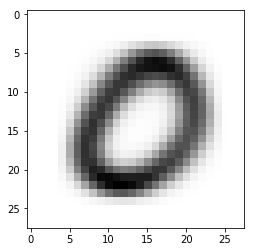

In [159]:
plt.imshow(im_average[:,0].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.show()

### True Negative의 이미지는 다음과 같습니다.

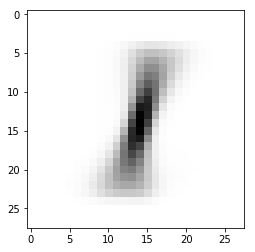

In [246]:
plt.imshow(im_average[:,1].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.show()